# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset diperoleh dari kaggle dengan berikut adalah link kaggel nya 
   https://www.kaggle.com/code/amathiyazhagan2004/gold-high-prediction-regression-models-comparison

2. **Case Study**
   Dataset ini memiliki case study perdiksi harga emas, berdasarkan variabel variabel keuangan, dengan jenisnya casenya adalah regresi


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df_regression = pd.read_csv(r"D:\Project\SML_Submision\Eksperimen_SML_Alamsyah\dataset\financial_regression_raw.csv")
df_regression.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Dataset Metadata 
- S&P 500 - SPDR S&P 500 ETF Trust
- Nasdaq 100 - Invesco QQQ ETF
- US Interest Rates - monthly federal rates
- CPI - Consumer Price Index, monthly
- USD / CHF forex rate
- EUR / USD forex rate
- GDP - Gross Domestic Product, trimonthly
- Silver - abrdn Physical Silver Shares ETF
- Oil - USO ETF
- Platinum - abrdn Physical Platinum Shares ETF
- Palladium - abrdn Physical Palladium Shares ETF- Gold - SPDR Gold Trust ETF

### Find The Number Of Null

In [4]:
# Check the number of null values
df_regression.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

### Visualization 

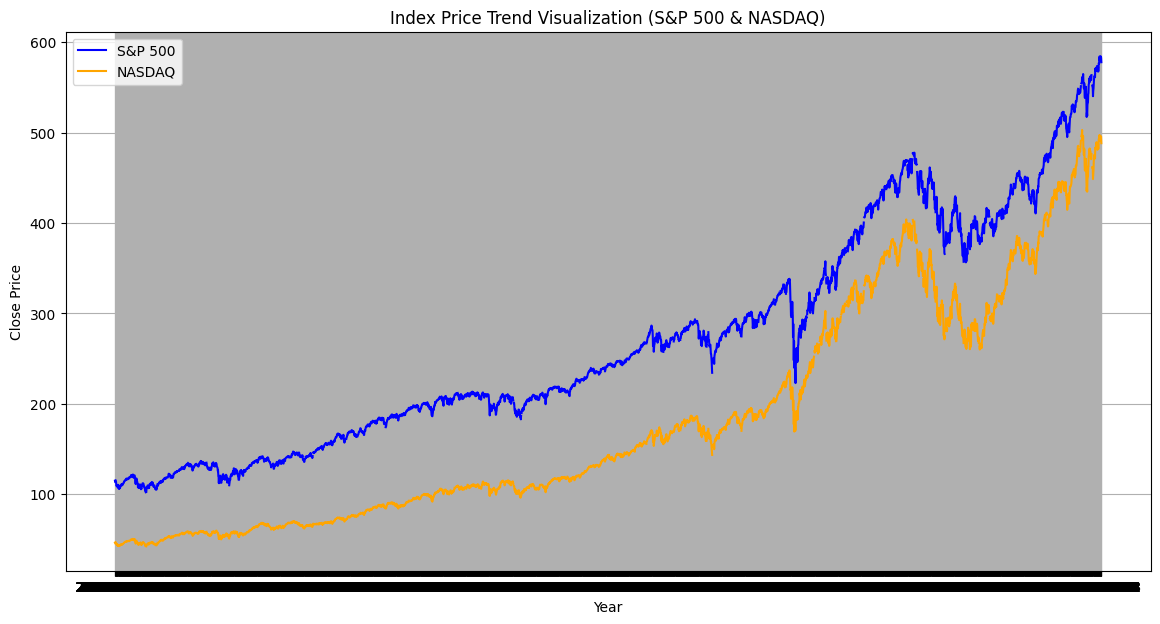

In [5]:
# 1. Index Price Trend Visualization (S&P 500 & NASDAQ)

plt.figure(figsize=(14, 7))
plt.plot(df_regression['date'], df_regression['sp500 close'], label='S&P 500', color='blue')
plt.plot(df_regression['date'], df_regression['nasdaq close'], label='NASDAQ', color='orange')
plt.title('Index Price Trend Visualization (S&P 500 & NASDAQ)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


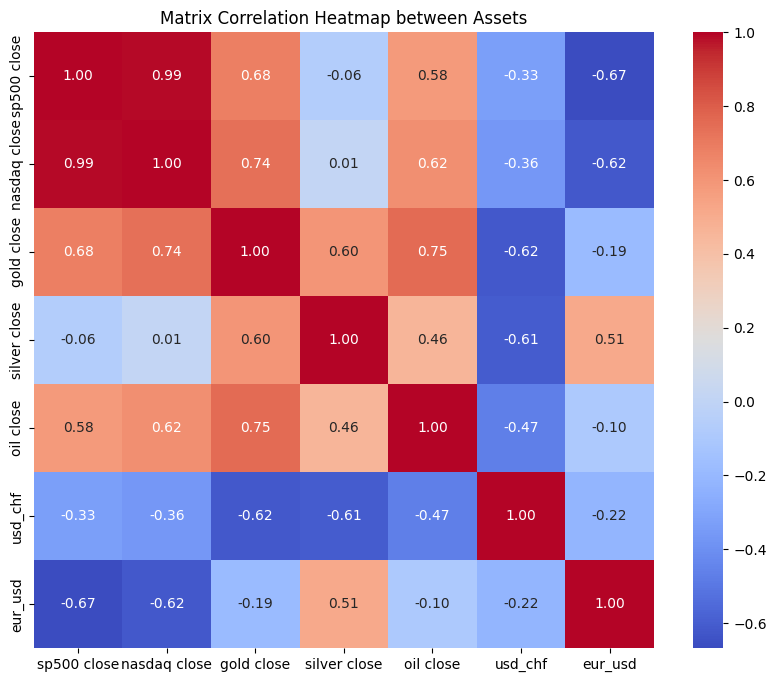

In [6]:
# Correlation Heatmap between Assets
cols_to_corr = ['sp500 close', 'nasdaq close', 'gold close', 'silver close', 'oil close', 'usd_chf', 'eur_usd']
corr_matrix = df_regression[cols_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Correlation Heatmap between Assets')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_920\1561751533.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_regression['sp500_return'] = df_regression['sp500 close'].pct_change()


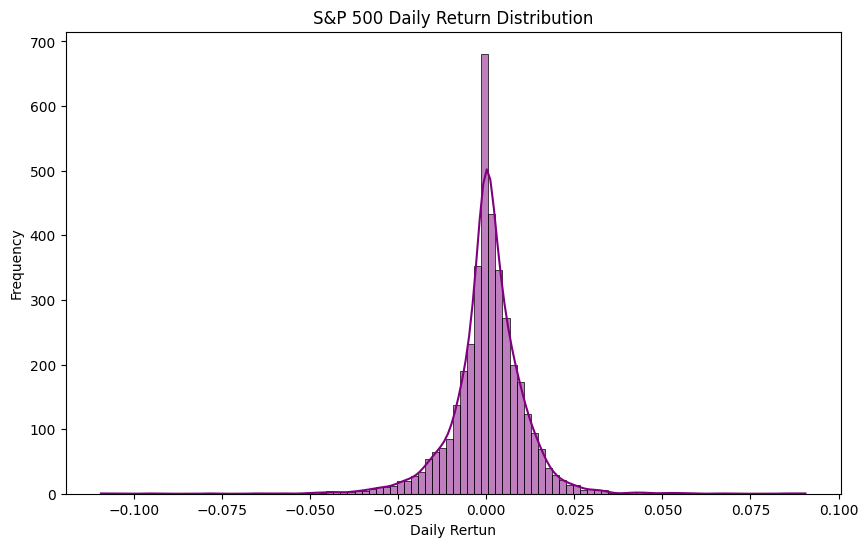

In [7]:

# S&P 500 Daily Return Distribution
df_regression['sp500_return'] = df_regression['sp500 close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df_regression['sp500_return'].dropna(), bins=100, kde=True, color='purple')
plt.title('S&P 500 Daily Return Distribution')
plt.xlabel('Daily Rertun')
plt.ylabel('Frequency')
plt.show()


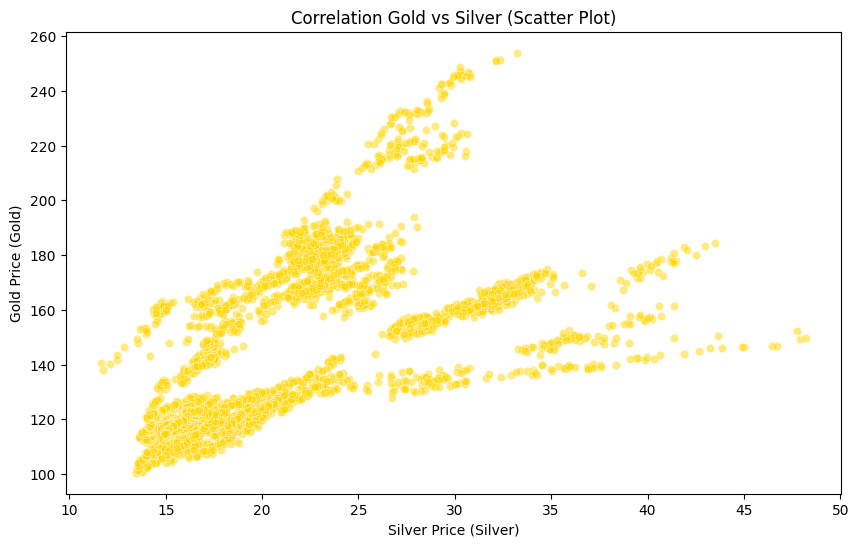

In [8]:

# Correlation Gold vs Silver (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_regression, x='silver close', y='gold close', alpha=0.5, color='gold')
plt.title('Correlation Gold vs Silver (Scatter Plot)')
plt.xlabel('Silver Price (Silver)')
plt.ylabel('Gold Price (Gold)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Feature Engineering: Date Transformation
df_regression['date'] = pd.to_datetime(df_regression['date'])
df_regression['year'] = df_regression['date'].dt.year
df_regression['month'] = df_regression['date'].dt.month
df_regression['day'] = df_regression['date'].dt.day
df_regression['day_of_week'] = df_regression['date'].dt.dayofweek
df_regression.drop(columns=['date'], inplace=True)

In [10]:
# Data Cleaning (Handling Missing Values)
## Drop column >90% Missing Value
df_regression = df_regression.drop(labels=['us_rates_%', 'CPI', 'GDP'], axis=1)

In [11]:
# Delete nan date (Market Holiday)
cols_to_check = df_regression.columns.difference(['year', 'month', 'day', 'day_of_week'])
df_regression = df_regression.dropna(subset=cols_to_check, how='all')

In [12]:
# Fill NaN value with mean
df_regression.fillna(df_regression.mean(), inplace=True)

In [13]:
# Feature Selection: Handle Data Leakage for Gold Target
target = 'gold high'
features_to_drop = ['gold open', 'gold close', 'gold low'] # Data leakage
df_regression = df_regression.drop(columns=[col for col in features_to_drop if col in df_regression.columns])

In [14]:
# Feature Selection: Handle Data redundant feature 
redundant_features = [
    'oil open', 'oil close', 'oil low',
    'platinum open', 'platinum close', 'platinum low',
    'nasdaq open', 'nasdaq close', 'nasdaq low',
    'sp500 open', 'sp500 close', 'sp500 low',
    'silver open', 'silver close', 'silver low'
]

df_regression = df_regression.drop(columns=[col for col in redundant_features if col in df_regression.columns], errors='ignore')

In [15]:
df_regression.head()

,sp500 high,sp500 volume,sp500 high-low,nasdaq high,nasdaq volume,nasdaq high-low,usd_chf,eur_usd,silver high,silver volume,...,palladium close,palladium volume,palladium high-low,gold high,gold volume,sp500_return,year,month,day,day_of_week
0,115.140000,1.156470e+08,0.72000,46.520000,7.520900e+07,0.300000,1.020600,1.447800,18.70000,69804.000000,...,44.84000,364528.000000,1.160000,112.370000,1.830524e+07,0.000470,2010,1,14,3
1,114.840000,2.122528e+08,1.64000,46.550000,1.268493e+08,0.900000,1.026400,1.437600,18.54000,205106.000000,...,45.76000,442210.000000,1.360000,112.010000,1.800072e+07,-0.011224,2010,1,15,4
2,270.179765,1.124206e+08,3.02232,182.689784,4.533532e+07,2.707295,0.947314,1.191437,21.60806,385797.336381,...,109.06799,71695.557139,2.252611,146.101477,9.658138e+06,0.000000,2010,1,18,0
3,115.130000,1.386719e+08,1.54000,46.640000,8.438820e+07,0.690000,1.034000,1.426900,18.79000,130552.000000,...,46.94000,629150.000000,1.380000,111.750000,1.046793e+07,0.012496,2010,1,19,1
4,114.450000,2.163306e+08,1.47000,46.604000,1.456800e+08,1.174000,1.045300,1.409400,18.31000,230907.000000,...,47.05000,643198.000000,2.140000,110.050000,1.753423e+07,-0.010169,2010,1,20,2


In [16]:
# 6. Feature selection usng random forest (Feature Importance)
X = df_regression.drop(target, axis=1)
y = df_regression[target]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get the feateure importance > 0.01
importances = pd.Series(rf.feature_importances_, index=X.columns)
selected_features = importances[importances > 0.01].index.tolist()

print(f"Selection feature based Importance: {selected_features}")
df_final = df_regression[selected_features + [target]]

Selection feature based Importance: ['sp500 high', 'nasdaq high', 'usd_chf', 'eur_usd', 'silver high', 'palladium high', 'palladium low', 'year', 'month']


In [17]:
# Splitting Data & Scaling
X_final = df_final.drop(target, axis=1)
y_final = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Normalize data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Preprocessing Complete ---")
print(f"Ukuran Data Train: {X_train_scaled.shape}")
print(f"Ukuran Data Test: {X_test_scaled.shape}")


--- Preprocessing Complete ---
Ukuran Data Train: (3123, 9)
Ukuran Data Test: (781, 9)


In [18]:
df_final.to_csv("financial_regression_preprocessing.csv")